In [59]:
import warnings
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from statistics import mean 
from itertools import product
from sklearn.model_selection import TimeSeriesSplit

import datetime

import fix_yahoo_finance as yf
from pandas_datareader import data as pdr
import datetime
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import pandas as pd

In [60]:
# Leo los indicadores

indicadores = pd.read_excel('./data/Datos Acciones renta variable.xlsx', sheet_name='Precios acciones', skiprows = 6)
indicadores
#indicadores['Date'] = pd.to_datetime(indicadores['Date'], format="%Y-%m-%d")
#indicadores = indicadores.set_index('Date')
#indicadores = indicadores.loc['2015-04-30':,:]

,Unnamed: 0,Unnamed: 1,OR FP Equity,DG FP Equity,BBVA SQ Equity,SAN SQ Equity,ASML NA Equity,PHIA NA Equity,TEF SQ Equity,FP FP Equity,...,MRK UN Equity,INTC UW Equity.1,RTX UN Equity,VZ UN Equity,KO UN Equity,CSCO UW Equity.1,XOM UN Equity,WBA UW Equity.1,PFE UN Equity,DOW UN Equity
0,NaN,NaN,Last Price,Last Price,Last Price,Last Price,Last Price,Last Price,Last Price,Last Price,...,Last Price,Last Price,Last Price,Last Price,Last Price,Last Price,Last Price,Last Price,Last Price,Last Price
1,NaN,Dates,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,...,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST
2,NaN,2005-05-06 00:00:00,57.25,29.4049,11.9228,8.5283,11.76,19.78,13.3273,43.9173,...,34.16,24.49,30.089,30.9777,22.095,18.01,57.6,NaN,27.61,NaN
3,NaN,2005-05-09 00:00:00,57.35,29.1349,11.8171,8.4733,11.79,19.68,13.2779,43.7692,...,34.2,24.8,30.384,30.9598,22.285,18.22,58.01,NaN,27.97,NaN
4,NaN,2005-05-10 00:00:00,57.25,29.4295,11.673,8.3174,11.73,19.52,13.1592,43.7939,...,33.88,24.67,30.063,30.7715,22.115,18.22,57.23,NaN,27.66,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933,NaN,2020-06-01 00:00:00,258.8,83.96,2.861,2.0725,292.9,40.915,4.4,34.545,...,79.56,61.86,64.12,55.78,46.99,46.3,46.28,43.3,35.46,38.61
3934,NaN,2020-06-02 00:00:00,261.2,85.98,3.005,2.1635,296.7,40.9,4.46,35.545,...,80.84,62.12,63.4,56.4,46.9,46.89,47.31,43.55,36.16,40.6
3935,NaN,2020-06-03 00:00:00,270.4,90.1,3.16,2.2325,308.05,41.015,4.658,36.425,...,82.06,61.93,67.47,56.83,47.9,46.94,49.24,43.61,36.16,41.63
3936,NaN,2020-06-04 00:00:00,266.5,88.44,3.212,2.2695,310.3,41.29,4.643,36.115,...,81.55,62.97,67.51,57.22,47.92,46.86,49.1,44.2,36.01,42.71


In [61]:
indicadores.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'OR FP Equity', 'DG FP Equity',
       'BBVA SQ Equity', 'SAN SQ Equity', 'ASML NA Equity', 'PHIA NA Equity',
       'TEF SQ Equity', 'FP FP Equity',
       ...
       'MRK UN Equity', 'INTC UW Equity.1', 'RTX UN Equity', 'VZ UN Equity',
       'KO UN Equity', 'CSCO UW Equity.1', 'XOM UN Equity', 'WBA UW Equity.1',
       'PFE UN Equity', 'DOW UN Equity'],
      dtype='object', length=220)

In [62]:
nombres = list(indicadores.columns[1:])
nombres[0] = 'Date'
nombres

['Date',
 'OR FP Equity',
 'DG FP Equity',
 'BBVA SQ Equity',
 'SAN SQ Equity',
 'ASML NA Equity',
 'PHIA NA Equity',
 'TEF SQ Equity',
 'FP FP Equity',
 'AI FP Equity',
 'CS FP Equity',
 'BNP FP Equity',
 'BN FP Equity',
 'VIV FP Equity',
 'EL FP Equity',
 'MC FP Equity',
 'KER FP Equity',
 'AMS SQ Equity',
 'SAF FP Equity',
 'AD NA Equity',
 'UNA NA Equity',
 'IBE SQ Equity',
 'INGA NA Equity',
 'LIN GY Equity',
 'ITX SQ Equity',
 'ISP IM Equity',
 'ENI IM Equity',
 'ENGI FP Equity',
 'ORA FP Equity',
 'ABI BB Equity',
 'SAN FP Equity',
 'GLE FP Equity',
 'ENEL IM Equity',
 'NOKIA FH Equity',
 'SU FP Equity',
 'ALV GY Equity',
 'AIR FP Equity',
 'BAYN GY Equity',
 'BMW GY Equity',
 'CRH ID Equity',
 'BAS GY Equity',
 'SIE GY Equity',
 'VOW3 GY Equity',
 'MUV2 GY Equity',
 'FRE GY Equity',
 'SAP GY Equity',
 'ADS GY Equity',
 'DTE GY Equity',
 'DPW GY Equity',
 'DAI GY Equity',
 'DB1 GY Equity',
 'IBE SM Equity',
 'ITX SM Equity',
 'SAN SM Equity',
 'TEF SM Equity',
 'AMS SM Equity',


In [63]:
indicadores = indicadores.iloc[2:, 1:]
indicadores.columns = nombres
indicadores

,Date,OR FP Equity,DG FP Equity,BBVA SQ Equity,SAN SQ Equity,ASML NA Equity,PHIA NA Equity,TEF SQ Equity,FP FP Equity,AI FP Equity,...,MRK UN Equity,INTC UW Equity.1,RTX UN Equity,VZ UN Equity,KO UN Equity,CSCO UW Equity.1,XOM UN Equity,WBA UW Equity.1,PFE UN Equity,DOW UN Equity
2,2005-05-06 00:00:00,57.25,29.4049,11.9228,8.5283,11.76,19.78,13.3273,43.9173,36.6479,...,34.16,24.49,30.089,30.9777,22.095,18.01,57.6,NaN,27.61,NaN
3,2005-05-09 00:00:00,57.35,29.1349,11.8171,8.4733,11.79,19.68,13.2779,43.7692,36.5448,...,34.2,24.8,30.384,30.9598,22.285,18.22,58.01,NaN,27.97,NaN
4,2005-05-10 00:00:00,57.25,29.4295,11.673,8.3174,11.73,19.52,13.1592,43.7939,36.4159,...,33.88,24.67,30.063,30.7715,22.115,18.22,57.23,NaN,27.66,NaN
5,2005-05-11 00:00:00,56.5,29.4295,11.7883,8.299,11.69,19.41,13.1197,43.6459,36.2871,...,33.5,24.77,30.662,30.8164,22.135,18.58,57.29,NaN,27.65,NaN
6,2005-05-12 00:00:00,56.7,29.454,11.9132,8.3174,11.93,19.66,13.2581,43.4732,36.4417,...,33.64,24.85,30.069,30.7357,22.085,18.7,54.82,NaN,27.63,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933,2020-06-01 00:00:00,258.8,83.96,2.861,2.0725,292.9,40.915,4.4,34.545,122.35,...,79.56,61.86,64.12,55.78,46.99,46.3,46.28,43.3,35.46,38.61
3934,2020-06-02 00:00:00,261.2,85.98,3.005,2.1635,296.7,40.9,4.46,35.545,123.3,...,80.84,62.12,63.4,56.4,46.9,46.89,47.31,43.55,36.16,40.6
3935,2020-06-03 00:00:00,270.4,90.1,3.16,2.2325,308.05,41.015,4.658,36.425,126,...,82.06,61.93,67.47,56.83,47.9,46.94,49.24,43.61,36.16,41.63
3936,2020-06-04 00:00:00,266.5,88.44,3.212,2.2695,310.3,41.29,4.643,36.115,125.35,...,81.55,62.97,67.51,57.22,47.92,46.86,49.1,44.2,36.01,42.71


In [64]:
indicadores.Date = indicadores.Date.apply(lambda x: x.strftime('%Y-%m-%d'))
indicadores

,Date,OR FP Equity,DG FP Equity,BBVA SQ Equity,SAN SQ Equity,ASML NA Equity,PHIA NA Equity,TEF SQ Equity,FP FP Equity,AI FP Equity,...,MRK UN Equity,INTC UW Equity.1,RTX UN Equity,VZ UN Equity,KO UN Equity,CSCO UW Equity.1,XOM UN Equity,WBA UW Equity.1,PFE UN Equity,DOW UN Equity
2,2005-05-06,57.25,29.4049,11.9228,8.5283,11.76,19.78,13.3273,43.9173,36.6479,...,34.16,24.49,30.089,30.9777,22.095,18.01,57.6,NaN,27.61,NaN
3,2005-05-09,57.35,29.1349,11.8171,8.4733,11.79,19.68,13.2779,43.7692,36.5448,...,34.2,24.8,30.384,30.9598,22.285,18.22,58.01,NaN,27.97,NaN
4,2005-05-10,57.25,29.4295,11.673,8.3174,11.73,19.52,13.1592,43.7939,36.4159,...,33.88,24.67,30.063,30.7715,22.115,18.22,57.23,NaN,27.66,NaN
5,2005-05-11,56.5,29.4295,11.7883,8.299,11.69,19.41,13.1197,43.6459,36.2871,...,33.5,24.77,30.662,30.8164,22.135,18.58,57.29,NaN,27.65,NaN
6,2005-05-12,56.7,29.454,11.9132,8.3174,11.93,19.66,13.2581,43.4732,36.4417,...,33.64,24.85,30.069,30.7357,22.085,18.7,54.82,NaN,27.63,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933,2020-06-01,258.8,83.96,2.861,2.0725,292.9,40.915,4.4,34.545,122.35,...,79.56,61.86,64.12,55.78,46.99,46.3,46.28,43.3,35.46,38.61
3934,2020-06-02,261.2,85.98,3.005,2.1635,296.7,40.9,4.46,35.545,123.3,...,80.84,62.12,63.4,56.4,46.9,46.89,47.31,43.55,36.16,40.6
3935,2020-06-03,270.4,90.1,3.16,2.2325,308.05,41.015,4.658,36.425,126,...,82.06,61.93,67.47,56.83,47.9,46.94,49.24,43.61,36.16,41.63
3936,2020-06-04,266.5,88.44,3.212,2.2695,310.3,41.29,4.643,36.115,125.35,...,81.55,62.97,67.51,57.22,47.92,46.86,49.1,44.2,36.01,42.71


In [65]:
indicadores = indicadores.set_index('Date')
indicadores = indicadores.loc['2015-04-29':,:]

In [66]:
indicadores

,OR FP Equity,DG FP Equity,BBVA SQ Equity,SAN SQ Equity,ASML NA Equity,PHIA NA Equity,TEF SQ Equity,FP FP Equity,AI FP Equity,CS FP Equity,...,MRK UN Equity,INTC UW Equity.1,RTX UN Equity,VZ UN Equity,KO UN Equity,CSCO UW Equity.1,XOM UN Equity,WBA UW Equity.1,PFE UN Equity,DOW UN Equity
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-29,169.2,54.77,9.095,6.6233,96.98,25.91,13.56,48.435,93.3765,22.245,...,59.68,32.885,68.053,50.47,40.49,29.05,87.87,84.57,34.29,NaN
2015-04-30,170.45,54.82,9,6.6449,96.71,25.655,13.64,48.485,94.0205,22.615,...,59.56,32.55,67.091,50.44,40.56,28.83,87.37,82.93,33.93,NaN
2015-05-01,170.45,54.82,9,6.6449,96.71,25.655,13.64,48.485,94.0205,22.615,...,59.86,33.42,68.088,50.41,40.91,29.13,88.85,83.46,34.08,NaN
2015-05-04,173.35,54.6,9.04,6.638,96.78,25.44,13.765,48.13,95.4695,22.735,...,60.64,33.43,68.684,50.52,40.96,29.17,89.11,84.13,34.32,NaN
2015-05-05,166.7,53.76,8.825,6.4128,94.75,25.19,13.515,47.675,93.4168,22.275,...,60.49,32.64,67.87,50.09,40.75,28.89,88.61,83.14,34.12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01,258.8,83.96,2.861,2.0725,292.9,40.915,4.4,34.545,122.35,16.5,...,79.56,61.86,64.12,55.78,46.99,46.3,46.28,43.3,35.46,38.61
2020-06-02,261.2,85.98,3.005,2.1635,296.7,40.9,4.46,35.545,123.3,17.256,...,80.84,62.12,63.4,56.4,46.9,46.89,47.31,43.55,36.16,40.6
2020-06-03,270.4,90.1,3.16,2.2325,308.05,41.015,4.658,36.425,126,19.046,...,82.06,61.93,67.47,56.83,47.9,46.94,49.24,43.61,36.16,41.63


In [67]:
activos = pd.read_excel('./data/Datos Acciones renta variable.xlsx', sheet_name='Hoja2')
activos

,Ticker,Price,OPER_MARGIN,RETURN_ON_INV_CAPITAL,ROC_WACC_RATIO,OPERATING_ROIC,OPER_INC_TO_TOT_DEBT,CUR_MKT_CAP,PE_RATIO,PX_TO_BOOK_RATIO,...,EPS_GROWTH,DVD_PAYOUT_RATIO,Unnamed: 13,EQY_REC_CONS,TOT_ANALYST_REC,TOT_BUY_REC,TOT_SELL_REC,Unnamed: 18,TWITTER_SENTIMENT,NEWS_SENTIMENT
0,MELI UW Equity,866.93,-6.669863,-7.835844,-0.466724,-5.466515,-0.150538,4.309505e+10,-,23.0879,...,-330.771,-,NaN,3.869565,23,12,2,NaN,0.415005,-0.342350
1,CDW UW Equity,125.34,6.286462,19.492927,2.192339,25.143969,0.325888,1.783815e+10,23.6838,20.0471,...,19.2488,24.912,NaN,3.800000,10,5,1,NaN,0.297486,0.009725
2,AMZN UW Equity,2483.00,5.183551,4.500000,1.299721,11.393006,0.187541,1.238461e+12,118.634,18.9824,...,13.4429,0,NaN,4.745454,55,50,1,NaN,-0.033902,0.449071
3,ALXN UW Equity,115.21,42.483621,17.732685,1.980240,1.420000,0.767510,2.544153e+10,12.0687,2.16831,...,2977.14,0,NaN,4.360000,25,17,0,NaN,0.197014,-0.402494
4,BMRN UW Equity,105.80,-5.895198,2.837115,0.395703,1.500000,-0.110438,1.913254e+10,133.534,5.90273,...,70.4545,-,NaN,4.538462,26,20,0,NaN,0.118857,-0.212550
5,GOOG UW Equity,1438.39,21.148915,14.847055,1.899500,17.027738,2.143859,9.824010e+11,-,-,...,12.1438,0,NaN,5.000000,15,15,0,NaN,-0.257270,0.425929
6,VRSN UW Equity,211.28,65.450396,214.100405,30.761191,1.340000,0.448656,2.441118e+10,33.5895,-,...,0.779727,0,NaN,3.000000,4,1,1,NaN,-0.497409,0.116456
7,CSCO UW Equity,47.83,27.394806,18.245801,2.558312,24.375592,0.576462,2.019524e+11,16.7,5.65259,...,13050,51.45,NaN,3.800000,30,14,2,NaN,0.453963,0.048053
8,MSFT UW Equity,187.20,34.136980,23.872039,2.672929,27.060648,0.496894,1.419620e+12,33.0435,12.409,...,137.674,35.9506,NaN,4.783784,37,33,0,NaN,0.317293,0.024876
9,EBAY UW Equity,48.82,21.490741,18.285513,2.835520,19.243732,0.275588,3.430477e+10,19.2765,16.181,...,-18.2171,26.5312,NaN,3.406250,32,10,3,NaN,-0.308413,0.269024


In [68]:
lista_activos = activos['Ticker']
lista_activos

0      MELI UW Equity
1       CDW UW Equity
2      AMZN UW Equity
3      ALXN UW Equity
4      BMRN UW Equity
5      GOOG UW Equity
6      VRSN UW Equity
7      CSCO UW Equity
8      MSFT UW Equity
9      EBAY UW Equity
10     INCY UW Equity
11     BKNG UW Equity
12     ILMN UW Equity
13       JD UW Equity
14    GOOGL UW Equity
15     NFLX UW Equity
16     ADBE UW Equity
17     AMGN UW Equity
18     ADSK UW Equity
19     CDNS UW Equity
20     REGN UW Equity
21     ATVI UW Equity
22     EXPE UW Equity
23     CERN UW Equity
24     NTES UW Equity
25     SNPS UW Equity
26     SPLK UW Equity
27       EA UW Equity
28     FISV UW Equity
29     ANSS UW Equity
30       FB UW Equity
31     GILD UW Equity
32     SGEN UW Equity
33     TTWO UW Equity
34     BIIB UW Equity
35     VRTX UW Equity
36     PAYX UW Equity
37     INTU UW Equity
38     WDAY UW Equity
39     TCOM UW Equity
40     BIDU UW Equity
41     TMUS UW Equity
42       ZM UW Equity
43     CTXS UW Equity
Name: Ticker, dtype: object

In [69]:
lista_indices = []
for i in indicadores.columns:
    if i in list(activos['Ticker']):
        lista_indices.append(i)

In [70]:
lista_indices

['MELI UW Equity',
 'CDW UW Equity',
 'AMZN UW Equity',
 'ALXN UW Equity',
 'BMRN UW Equity',
 'GOOG UW Equity',
 'VRSN UW Equity',
 'CSCO UW Equity',
 'MSFT UW Equity',
 'EBAY UW Equity',
 'INCY UW Equity',
 'BKNG UW Equity',
 'ILMN UW Equity',
 'JD UW Equity',
 'GOOGL UW Equity',
 'NFLX UW Equity',
 'ADBE UW Equity',
 'AMGN UW Equity',
 'ADSK UW Equity',
 'CDNS UW Equity',
 'REGN UW Equity',
 'ATVI UW Equity',
 'EXPE UW Equity',
 'CERN UW Equity',
 'NTES UW Equity',
 'SNPS UW Equity',
 'SPLK UW Equity',
 'EA UW Equity',
 'FISV UW Equity',
 'ANSS UW Equity',
 'FB UW Equity',
 'GILD UW Equity',
 'SGEN UW Equity',
 'TTWO UW Equity',
 'BIIB UW Equity',
 'VRTX UW Equity',
 'PAYX UW Equity',
 'INTU UW Equity',
 'WDAY UW Equity',
 'TCOM UW Equity',
 'BIDU UW Equity',
 'TMUS UW Equity',
 'ZM UW Equity',
 'CTXS UW Equity']

In [71]:
activos_nasdaq = indicadores.loc[:, lista_indices]
activos_nasdaq

,MELI UW Equity,CDW UW Equity,AMZN UW Equity,ALXN UW Equity,BMRN UW Equity,GOOG UW Equity,VRSN UW Equity,CSCO UW Equity,MSFT UW Equity,EBAY UW Equity,...,BIIB UW Equity,VRTX UW Equity,PAYX UW Equity,INTU UW Equity,WDAY UW Equity,TCOM UW Equity,BIDU UW Equity,TMUS UW Equity,ZM UW Equity,CTXS UW Equity
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-29,142.975,38.59,429.37,173.61,115.19,549.08,64.14,29.05,49.06,24.7813,...,353.5,123.76,48.835,101.18,NaN,32.02,219,NaN,NaN,54.5617
2015-04-30,142.33,38.32,421.78,169.23,112.05,537.34,63.51,28.83,48.64,24.5204,...,344.427,123.28,48.39,100.33,NaN,31.84,200.28,NaN,NaN,53.4788
2015-05-01,145.35,38.67,422.87,172.5,115.92,537.9,64.15,29.13,48.655,24.956,...,355.748,125.6,48.85,100.59,NaN,31.9,202.47,NaN,NaN,53.3036
2015-05-04,152.27,38.82,423.04,171.3,116.32,540.78,64.42,29.17,48.24,24.8781,...,355.748,126.3,49.39,101.29,NaN,32.08,203.7,NaN,NaN,53.1921
2015-05-05,149.19,38.87,421.19,168.55,113.92,530.8,62.85,28.89,47.6,24.3836,...,355.361,122.15,49.09,100.01,NaN,31.495,194.74,NaN,NaN,52.7701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01,844.08,111.91,2471.04,118.92,107.39,1431.82,219.03,46.3,182.83,45.2,...,301.45,286.64,71.95,289.95,177.96,25.9,107.1,99.7,204.15,146.65
2020-06-02,859.77,113.27,2472.41,116.28,108.33,1439.22,217.39,46.89,184.91,45.98,...,302.86,284.27,73.22,287.18,178.83,26.65,107.23,100.41,208.08,143.87
2020-06-03,853.52,115.09,2478.4,113.77,111.21,1436.38,213.96,46.94,185.36,46.45,...,302.6,277.01,74.79,290.1,181.71,27.95,112.45,101.21,223.87,139.57


In [72]:
activos_nasdaq = activos_nasdaq.applymap(lambda x: x/1.1285216494845334)
activos_nasdaq

,MELI UW Equity,CDW UW Equity,AMZN UW Equity,ALXN UW Equity,BMRN UW Equity,GOOG UW Equity,VRSN UW Equity,CSCO UW Equity,MSFT UW Equity,EBAY UW Equity,...,BIIB UW Equity,VRTX UW Equity,PAYX UW Equity,INTU UW Equity,WDAY UW Equity,TCOM UW Equity,BIDU UW Equity,TMUS UW Equity,ZM UW Equity,CTXS UW Equity
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-29,126.692297,34.195179,380.471212,153.838431,102.071591,486.548043,56.835418,25.741642,43.472804,21.959082,...,313.241665,109.665597,43.273428,89.657119,NaN,28.373403,194.059192,NaN,NaN,48.347943
2015-04-30,126.120753,33.955928,373.745599,149.957247,99.289190,476.145052,56.277166,25.546696,43.100635,21.727895,...,305.201943,109.240261,42.879107,88.903921,NaN,28.213903,177.471119,NaN,NaN,47.388369
2015-05-01,128.796820,34.266068,374.711465,152.854843,102.718455,476.641277,56.844279,25.812531,43.113927,22.113887,...,315.233651,111.296048,43.286719,89.134311,NaN,28.267070,179.411711,NaN,NaN,47.233121
2015-05-04,134.928736,34.398986,374.862104,151.791505,103.072901,479.193288,57.083531,25.847976,42.746189,22.044858,...,315.233651,111.916329,43.765222,89.754592,NaN,28.426570,180.501632,NaN,NaN,47.134320
2015-05-05,132.199502,34.443291,373.222791,149.354689,100.946225,470.349860,55.692330,25.599863,42.179076,21.606675,...,314.890725,108.238951,43.499387,88.620365,NaN,27.908193,172.562042,NaN,NaN,46.760379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01,747.951978,99.165133,2189.625694,105.376800,95.159894,1268.757228,194.085776,41.027126,162.008412,40.052400,...,267.119377,253.996013,63.755977,256.929054,157.693031,22.950379,94.902920,88.345669,180.900384,129.948770
2020-06-02,761.855123,100.370250,2190.839672,103.037456,95.992842,1275.314479,192.632547,41.549934,163.851531,40.743569,...,268.368799,251.895921,64.881343,254.474516,158.463952,23.614966,95.018115,88.974811,184.382816,127.485370
2020-06-03,756.316904,101.982979,2196.147501,100.813307,98.544853,1272.797913,189.593173,41.594240,164.250283,41.160043,...,268.138409,245.462726,66.272543,257.061971,161.015963,24.766915,99.643636,89.683703,198.374573,123.675075


In [73]:
nasdaq = pd.read_excel('./data/Datos Acciones renta variable.xlsx', sheet_name='Precios Index', skiprows = 5,
                           usecols=[1, 6])

In [74]:
nasdaq = nasdaq.iloc[3:,:]
nasdaq.columns = ['Date', 'Nasdaq']
nasdaq.Date = nasdaq.Date.apply(lambda x: x.strftime('%Y-%m-%d'))
nasdaq = nasdaq.set_index('Date')
nasdaq = nasdaq.loc['2015-04-29':,:]
nasdaq = nasdaq.applymap(lambda x: x/1.1285216494845334)

In [75]:
nasdaq

,Nasdaq
Date,
2015-04-29,4451.526475
2015-04-30,4378.670097
2015-05-01,4435.352217
2015-05-04,4445.576212
2015-05-05,4376.811913
...,...
2020-06-01,8464.214226
2020-06-02,8514.125541
2020-06-03,8580.173012


In [76]:
datos = pd.concat([activos_nasdaq, nasdaq], axis = 1)
datos

,MELI UW Equity,CDW UW Equity,AMZN UW Equity,ALXN UW Equity,BMRN UW Equity,GOOG UW Equity,VRSN UW Equity,CSCO UW Equity,MSFT UW Equity,EBAY UW Equity,...,VRTX UW Equity,PAYX UW Equity,INTU UW Equity,WDAY UW Equity,TCOM UW Equity,BIDU UW Equity,TMUS UW Equity,ZM UW Equity,CTXS UW Equity,Nasdaq
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-29,126.692297,34.195179,380.471212,153.838431,102.071591,486.548043,56.835418,25.741642,43.472804,21.959082,...,109.665597,43.273428,89.657119,NaN,28.373403,194.059192,NaN,NaN,48.347943,4451.526475
2015-04-30,126.120753,33.955928,373.745599,149.957247,99.289190,476.145052,56.277166,25.546696,43.100635,21.727895,...,109.240261,42.879107,88.903921,NaN,28.213903,177.471119,NaN,NaN,47.388369,4378.670097
2015-05-01,128.796820,34.266068,374.711465,152.854843,102.718455,476.641277,56.844279,25.812531,43.113927,22.113887,...,111.296048,43.286719,89.134311,NaN,28.267070,179.411711,NaN,NaN,47.233121,4435.352217
2015-05-04,134.928736,34.398986,374.862104,151.791505,103.072901,479.193288,57.083531,25.847976,42.746189,22.044858,...,111.916329,43.765222,89.754592,NaN,28.426570,180.501632,NaN,NaN,47.134320,4445.576212
2015-05-05,132.199502,34.443291,373.222791,149.354689,100.946225,470.349860,55.692330,25.599863,42.179076,21.606675,...,108.238951,43.499387,88.620365,NaN,27.908193,172.562042,NaN,NaN,46.760379,4376.811913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01,747.951978,99.165133,2189.625694,105.376800,95.159894,1268.757228,194.085776,41.027126,162.008412,40.052400,...,253.996013,63.755977,256.929054,157.693031,22.950379,94.902920,88.345669,180.900384,129.948770,8464.214226
2020-06-02,761.855123,100.370250,2190.839672,103.037456,95.992842,1275.314479,192.632547,41.549934,163.851531,40.743569,...,251.895921,64.881343,254.474516,158.463952,23.614966,95.018115,88.974811,184.382816,127.485370,8514.125541
2020-06-03,756.316904,101.982979,2196.147501,100.813307,98.544853,1272.797913,189.593173,41.594240,164.250283,41.160043,...,245.462726,66.272543,257.061971,161.015963,24.766915,99.643636,89.683703,198.374573,123.675075,8580.173012


In [77]:
datos.isna().sum()

MELI UW Equity        0
CDW UW Equity         0
AMZN UW Equity        0
ALXN UW Equity        0
BMRN UW Equity        0
GOOG UW Equity        0
VRSN UW Equity        0
CSCO UW Equity        0
MSFT UW Equity        0
EBAY UW Equity        0
INCY UW Equity        0
BKNG UW Equity        0
ILMN UW Equity        0
JD UW Equity          0
GOOGL UW Equity       0
NFLX UW Equity        0
ADBE UW Equity        0
AMGN UW Equity        0
ADSK UW Equity        0
CDNS UW Equity        0
REGN UW Equity        0
ATVI UW Equity        0
EXPE UW Equity        0
CERN UW Equity        0
NTES UW Equity        0
SNPS UW Equity        0
SPLK UW Equity        0
EA UW Equity          0
FISV UW Equity        0
ANSS UW Equity        0
FB UW Equity          0
GILD UW Equity        0
SGEN UW Equity        0
TTWO UW Equity        0
BIIB UW Equity        0
VRTX UW Equity        0
PAYX UW Equity        0
INTU UW Equity        0
WDAY UW Equity      625
TCOM UW Equity        0
BIDU UW Equity        0
TMUS UW Equity  

In [78]:
datos.pop('WDAY UW Equity')
datos.pop('TMUS UW Equity')
datos.pop('ZM UW Equity')

Date
2015-04-29           NaN
2015-04-30           NaN
2015-05-01           NaN
2015-05-04           NaN
2015-05-05           NaN
                 ...    
2020-06-01    180.900384
2020-06-02    184.382816
2020-06-03    198.374573
2020-06-04    186.394297
2020-06-05    183.957481
Name: ZM UW Equity, Length: 1333, dtype: float64

In [79]:
rentabilidades_total = datos.pct_change().dropna()

In [80]:
rentabilidades_total

,MELI UW Equity,CDW UW Equity,AMZN UW Equity,ALXN UW Equity,BMRN UW Equity,GOOG UW Equity,VRSN UW Equity,CSCO UW Equity,MSFT UW Equity,EBAY UW Equity,...,SGEN UW Equity,TTWO UW Equity,BIIB UW Equity,VRTX UW Equity,PAYX UW Equity,INTU UW Equity,TCOM UW Equity,BIDU UW Equity,CTXS UW Equity,Nasdaq
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-30,-0.004511,-0.006997,-0.017677,-0.025229,-0.027259,-0.021381,-0.009822,-0.007573,-0.008561,-0.010528,...,-0.020816,-0.028290,-0.025666,-0.003878,-0.009112,-0.008401,-0.005621,-0.085479,-0.019847,-0.016367
2015-05-01,0.021218,0.009134,0.002584,0.019323,0.034538,0.001042,0.010077,0.010406,0.000308,0.017765,...,-0.009027,0.027848,0.032869,0.018819,0.009506,0.002591,0.001884,0.010935,-0.003276,0.012945
2015-05-04,0.047609,0.003879,0.000402,-0.006957,0.003451,0.005354,0.004209,0.001373,-0.008529,-0.003121,...,0.004996,0.003695,0.000000,0.005573,0.011054,0.006959,0.005643,0.006075,-0.002092,0.002305
2015-05-05,-0.020227,0.001288,-0.004373,-0.016054,-0.020633,-0.018455,-0.024371,-0.009599,-0.013267,-0.019877,...,0.023392,-0.015542,-0.001088,-0.032858,-0.006074,-0.012637,-0.018236,-0.043986,-0.007934,-0.015468
2015-05-06,-0.004558,-0.005917,-0.004962,-0.080332,0.050737,-0.012396,0.007796,0.002769,-0.027731,-0.007681,...,0.064857,0.002077,-0.005805,0.006386,-0.001833,-0.004700,0.005398,-0.024083,-0.006489,-0.003985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01,-0.008912,0.009016,0.011739,-0.008173,0.007884,0.002030,0.000091,-0.031786,-0.002292,-0.007466,...,0.011513,0.000367,-0.018366,-0.004584,-0.004566,-0.001274,-0.025216,0.005162,-0.009924,0.006552
2020-06-02,0.018588,0.012153,0.000554,-0.022200,0.008753,0.005168,-0.007488,0.012743,0.011377,0.017257,...,0.011319,-0.011893,0.004677,-0.008268,0.017651,-0.009553,0.028958,0.001214,-0.018957,0.005897
2020-06-03,-0.007269,0.016068,0.002423,-0.021586,0.026585,-0.001973,-0.015778,0.001066,0.002434,0.010222,...,-0.035879,-0.039376,-0.000858,-0.025539,0.021442,0.010168,0.048780,0.048680,-0.029888,0.007757


In [81]:
beta = rentabilidades_total.cov().div(rentabilidades_total.var())
beta

,MELI UW Equity,CDW UW Equity,AMZN UW Equity,ALXN UW Equity,BMRN UW Equity,GOOG UW Equity,VRSN UW Equity,CSCO UW Equity,MSFT UW Equity,EBAY UW Equity,...,SGEN UW Equity,TTWO UW Equity,BIIB UW Equity,VRTX UW Equity,PAYX UW Equity,INTU UW Equity,TCOM UW Equity,BIDU UW Equity,CTXS UW Equity,Nasdaq
MELI UW Equity,1.000000,0.579449,0.671768,0.393852,0.390426,0.752400,0.726637,0.703488,0.813717,0.557078,...,0.281089,0.450668,0.269826,0.404436,0.673535,0.704012,0.383081,0.454997,0.549226,1.249047
CDW UW Equity,0.251191,1.000000,0.435264,0.237374,0.304745,0.574443,0.560586,0.638007,0.640579,0.427927,...,0.214766,0.291063,0.219258,0.277063,0.698126,0.585107,0.242341,0.309695,0.432738,1.011879
AMZN UW Equity,0.285812,0.427196,1.000000,0.289096,0.294707,0.720590,0.564788,0.572685,0.726282,0.367162,...,0.215061,0.355206,0.188842,0.306631,0.466082,0.528140,0.249883,0.332467,0.492483,1.013469
ALXN UW Equity,0.286147,0.397833,0.493669,1.000000,0.536121,0.581916,0.540528,0.579689,0.607469,0.425089,...,0.364774,0.263684,0.395724,0.526870,0.554929,0.537461,0.232333,0.350160,0.499710,0.999865
BMRN UW Equity,0.278831,0.502054,0.494688,0.526998,1.000000,0.594797,0.599252,0.622885,0.620625,0.459838,...,0.431190,0.332772,0.414446,0.560985,0.592283,0.547201,0.246324,0.367365,0.474569,1.082262
GOOG UW Equity,0.265380,0.467390,0.597375,0.282504,0.293756,1.000000,0.571690,0.587888,0.745168,0.395525,...,0.204478,0.355390,0.234742,0.313975,0.583688,0.561389,0.244114,0.348593,0.435821,1.041458
VRSN UW Equity,0.258680,0.460362,0.472574,0.264855,0.298712,0.577013,1.000000,0.572958,0.674690,0.401775,...,0.190021,0.359262,0.190186,0.302271,0.621023,0.606470,0.210953,0.247237,0.460481,0.942036
CSCO UW Equity,0.242269,0.506848,0.463548,0.274777,0.300363,0.574004,0.554265,1.000000,0.675269,0.401723,...,0.198710,0.291214,0.238190,0.293175,0.668674,0.582960,0.215009,0.293305,0.474090,0.980786
MSFT UW Equity,0.291016,0.528480,0.610503,0.299028,0.310793,0.755575,0.677802,0.701262,1.000000,0.448707,...,0.217999,0.389225,0.255706,0.339186,0.701407,0.679199,0.256479,0.337731,0.538426,1.145136
EBAY UW Equity,0.218547,0.387267,0.338552,0.229537,0.252599,0.439929,0.442758,0.457631,0.492207,1.000000,...,0.195773,0.262522,0.213641,0.250331,0.447507,0.424048,0.219244,0.252766,0.396315,0.749483


In [82]:
betas = pd.DataFrame(beta.iloc[:-1,-1])
betas.columns = ['beta']
betas

,beta
MELI UW Equity,1.249047
CDW UW Equity,1.011879
AMZN UW Equity,1.013469
ALXN UW Equity,0.999865
BMRN UW Equity,1.082262
GOOG UW Equity,1.041458
VRSN UW Equity,0.942036
CSCO UW Equity,0.980786
MSFT UW Equity,1.145136
EBAY UW Equity,0.749483


In [83]:
def get_rank(df):
    '''
        df = dataframe que contiene las valoraciones por cada ratio
        ----------------------------------------------------------------------------------------------------------
        total = dataframe que devuelve el ranking de cada activo para cada ratio
    '''
    
    total = pd.DataFrame() # Dataframe auxiliar que devovlera los resultados
    
    # itero por las columnas, habra tantos ranking como columnas
        
    # Calculo las rentabilidades para el periodo, transpongo la matriz y genero el ranking
    rank = df.rank(ascending = False)
    # guardo el ranking como datafram
    rank = pd.DataFrame(rank)
    
    return rank

In [84]:
orden_beta = get_rank(betas)
orden_beta.columns = ['beta']
orden_beta

,beta
MELI UW Equity,3.0
CDW UW Equity,19.0
AMZN UW Equity,18.0
ALXN UW Equity,21.0
BMRN UW Equity,11.0
GOOG UW Equity,16.0
VRSN UW Equity,29.0
CSCO UW Equity,26.0
MSFT UW Equity,5.0
EBAY UW Equity,38.0


Establecemos un 20 % de las acciones como posiciones en largo y en corto

In [85]:
len(orden_beta) * 0.2

8.200000000000001

In [86]:
# Parámetros

peso_largos = 3
peso_cortos = -3
valores_largos = 10
valores_cortos = 10

In [87]:
peso_acciones_beta = []
for i in range(len(orden_beta)):
    lista_usar = []
    if orden_beta['beta'][i] <= valores_largos:
        porcentaje = peso_largos/valores_largos
        lista_usar.append(porcentaje)
    elif orden_beta['beta'][i] > (len(orden_beta) - valores_cortos):
        porcentaje = peso_cortos/valores_cortos
        lista_usar.append(porcentaje)
    else:
        porcentaje = 0
        lista_usar.append(porcentaje)
    peso_acciones_beta.extend(lista_usar)

In [88]:
df_final = pd.DataFrame(peso_acciones_beta, 
               columns =['pesos'])
df_final.index = orden_beta.index
df_final

,pesos
MELI UW Equity,0.3
CDW UW Equity,0.0
AMZN UW Equity,0.0
ALXN UW Equity,0.0
BMRN UW Equity,0.0
GOOG UW Equity,0.0
VRSN UW Equity,0.0
CSCO UW Equity,0.0
MSFT UW Equity,0.3
EBAY UW Equity,-0.3


In [89]:
def beta(returns, weights):
    '''
        returns = dataframe que contiene las rentabilidades diarias de los activos
        weights = pesos de los activos para cada uno de los periodos de tiempo y en total
        -----------------------------------------------------------------------------------
        final = resultado de la estrategia
    '''
    
    # genero los resultados como un indice de base 100
    resultados = [100]
    
    # cojo los pesos totales de la matriz de pesos
    pesos = weights.iloc[:,-1]
    
    # voy calculado los resultados como el anterior mas 1 por la rentabilidad que se obtienen diariamente de las
    # distintas acciones y sus pesos
    for i in range(1, len(returns)):
        
        value = resultados[i-1] * (1 + (returns.iloc[i] * pesos).sum())
        
        resultados.append(value)
    
    # meto en un dataframe para devovler el resultado final y asigno las fechas coo indice
    final = pd.DataFrame(resultados, columns=['low_beta'])  
    final.set_index(returns.index, inplace=True)
        
    return final

In [90]:
low_beta_nasdaq = beta(rentabilidades_total.iloc[:,:-1], df_final)
low_beta_nasdaq

,low_beta
Date,
2015-04-30,100.000000
2015-05-01,98.378586
2015-05-04,98.664648
2015-05-05,98.396564
2015-05-06,96.804086
...,...
2020-06-01,823.845979
2020-06-02,824.139657
2020-06-03,832.721077


In [91]:
nasdaq = nasdaq.iloc[1:,:]
nasdaq['Rentabilidad'] = nasdaq.pct_change().dropna() * 100
nasdaq


C:\Users\migue\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Nasdaq,Rentabilidad
Date,,
2015-04-30,4378.670097,NaN
2015-05-01,4435.352217,1.294505
2015-05-04,4445.576212,0.230511
2015-05-05,4376.811913,-1.546803
2015-05-06,4359.371397,-0.398475
...,...,...
2020-06-01,8464.214226,0.655193
2020-06-02,8514.125541,0.589675
2020-06-03,8580.173012,0.775740


In [92]:
nasdaq['Buy&Hold'] = 100

for i in range(1, len(nasdaq)):
    
    nasdaq['Buy&Hold'].iloc[i] = nasdaq['Buy&Hold'].iloc[i-1]*(1 + (nasdaq.Rentabilidad.iloc[i]/100))

C:\Users\migue\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\migue\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\migue\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [93]:
nasdaq

,Nasdaq,Rentabilidad,Buy&Hold
Date,,,
2015-04-30,4378.670097,NaN,100.000000
2015-05-01,4435.352217,1.294505,101.294505
2015-05-04,4445.576212,0.230511,101.528001
2015-05-05,4376.811913,-1.546803,99.957563
2015-05-06,4359.371397,-0.398475,99.559257
...,...,...,...
2020-06-01,8464.214226,0.655193,193.305594
2020-06-02,8514.125541,0.589675,194.445468
2020-06-03,8580.173012,0.775740,195.953859


In [94]:
len(low_beta_nasdaq)

1332

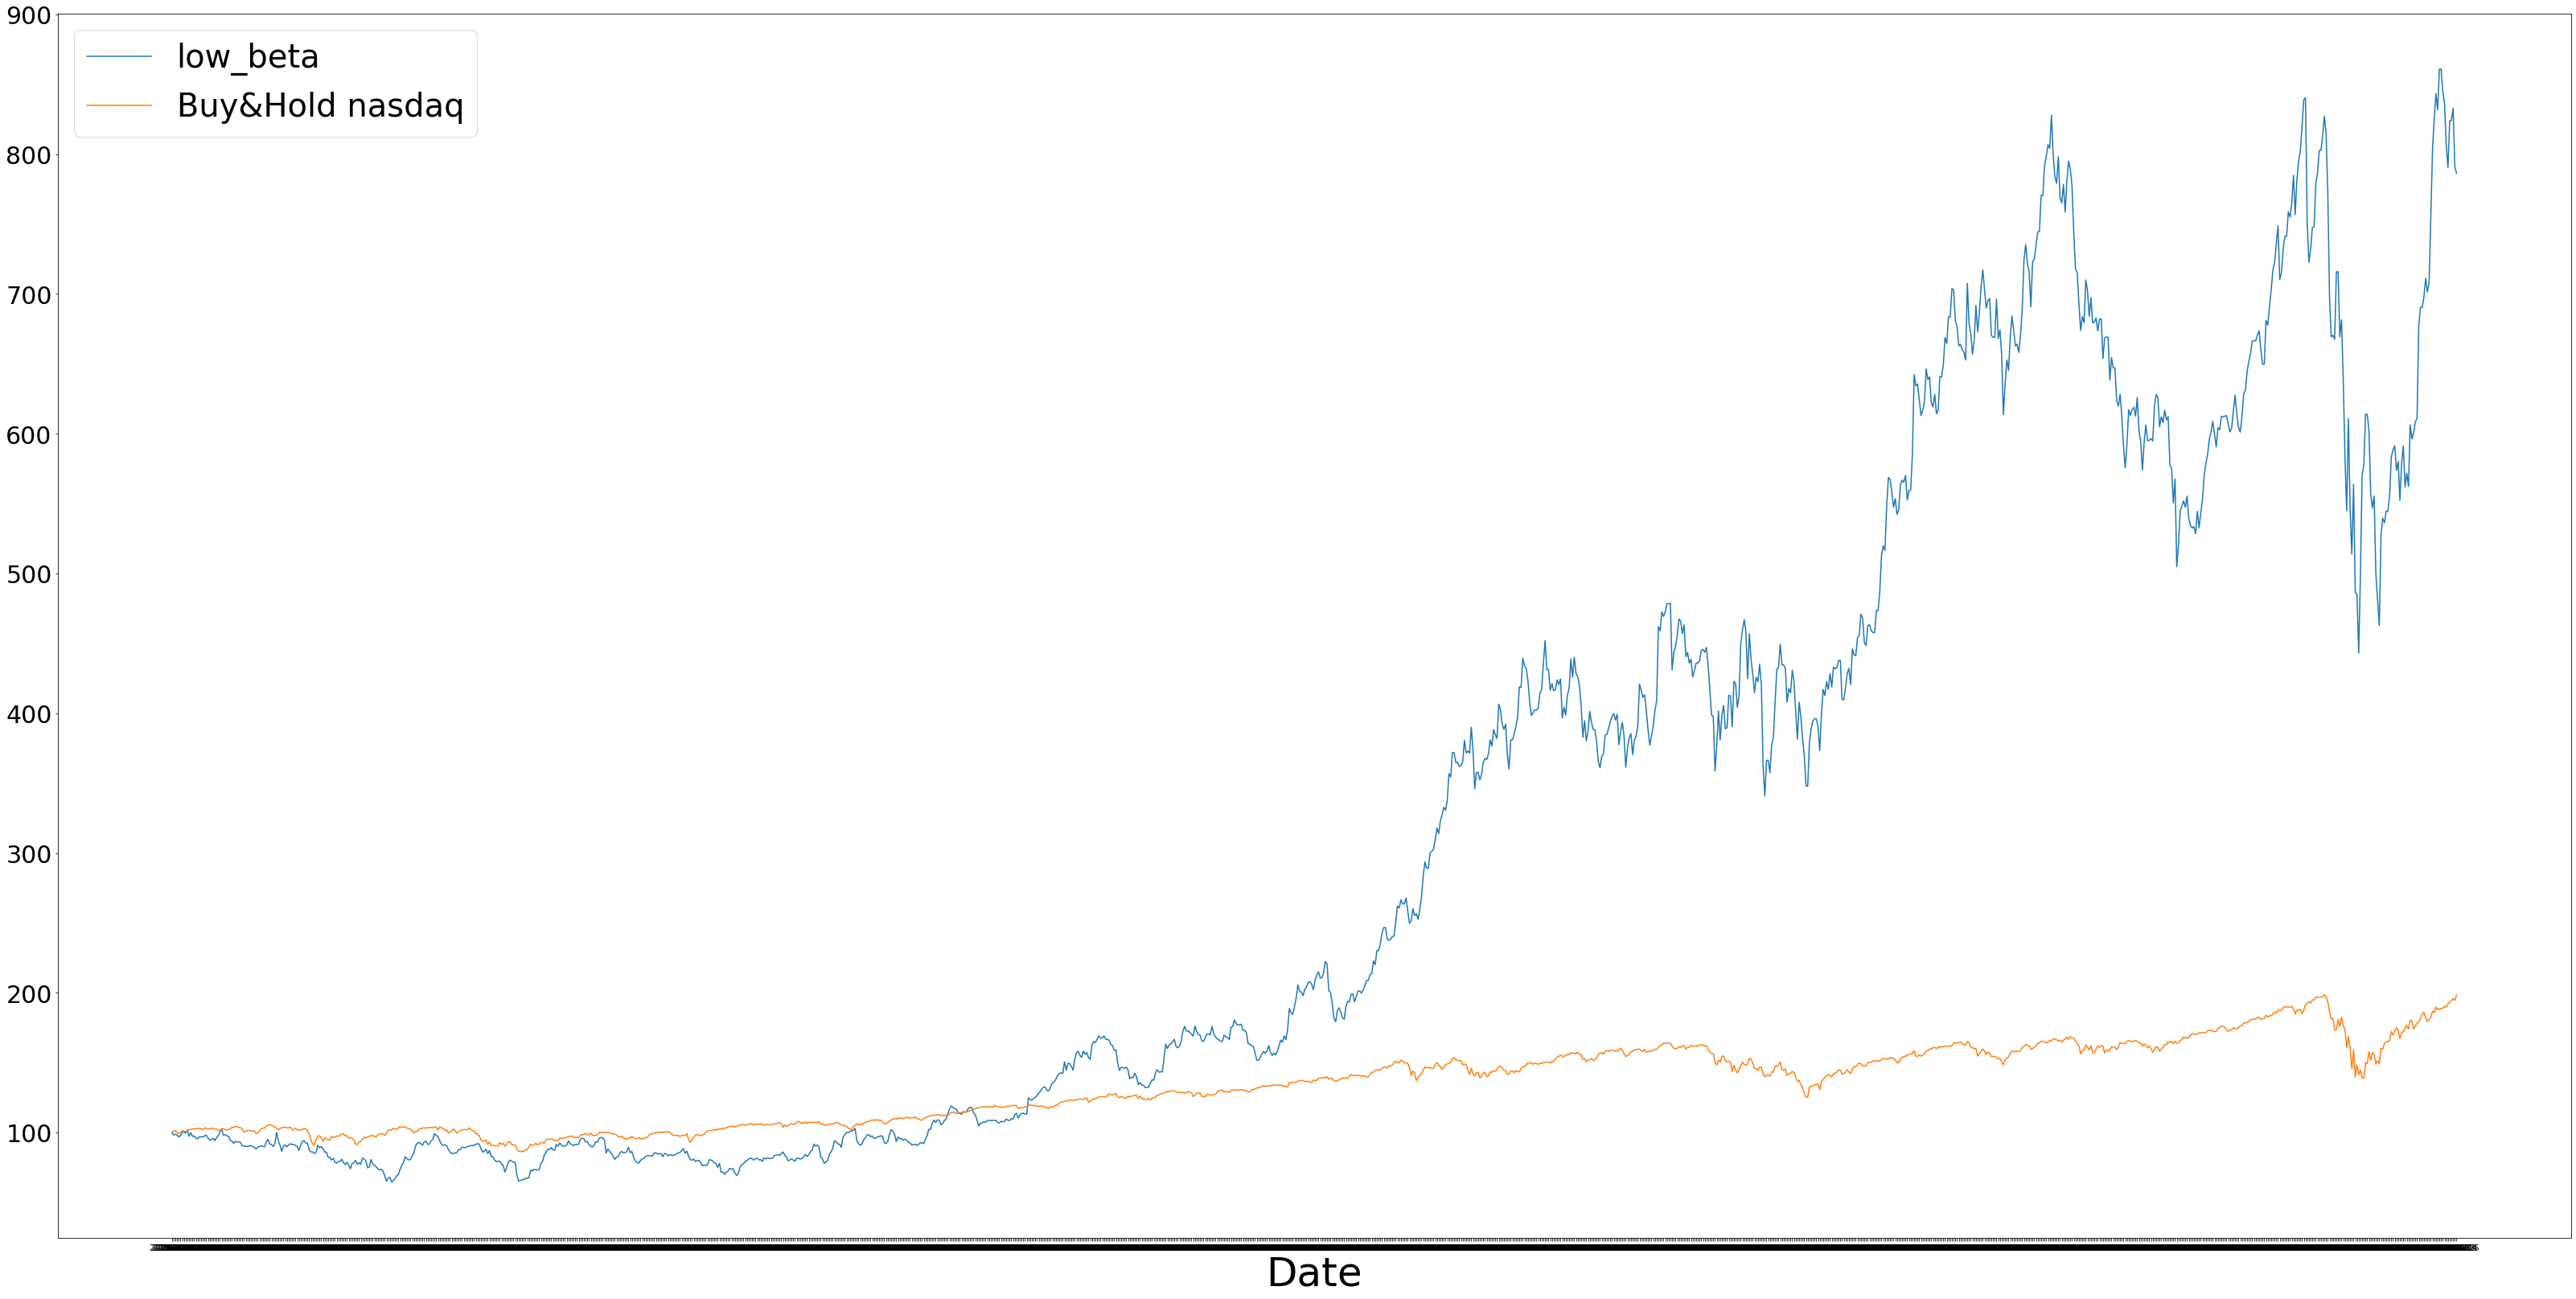

In [95]:
fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(low_beta_nasdaq["low_beta"])
ax1 = plt.plot(nasdaq["Buy&Hold"])
ax1 = plt.xlabel('Date', fontsize=50)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["low_beta", "Buy&Hold nasdaq"], prop={"size":40}, loc="upper left")
plt.show()

In [96]:
low_beta_nasdaq.to_csv('./data_resultante/low_beta_nasdaq.csv')

In [97]:
datos.to_csv('./data/activos_nasdaq.csv')

In [98]:
nasdaq.to_csv('./data/nasdaq.csv')

Ventajas:

- Se trabaja al contrario que los gestores que siguen distintos índices, es decir, que comprar activos con betas altas en relación a distintos índices.

Desventajas:

- No aprovecha periodos alcistas, ya que funciona mal en ellas.
- Sólo tiene en cuenta información sobre la relación de los activos con un índice.
- Información accesible para todo el mundo.